# Pymaceuticals Inc.
---

### Analysis

- Of the four treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin), Capomulin and Ramicane performed better than Infubinol and Ceftamin. This is observed in the boxplots, wherein the final tumor volumes are compared against each other. The lower the boxplot, the lower the average final tumor volumes.

- Despite Capomulin having the highest number of observed timepoints (as per the bar chart), it has the smallest spread of values (as per the boxplot range), when compared against the final four treatment regimens.
  
- The regression line demonstrates a positive correlation between the average tumor volume and mouse weight, with a corresponding correlation value of 0.84. This is logical as the weight of the mouse increases with the volume of the tumor size, implying that weight gain in the mouse is due to the tumor.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Clean column names
merged_data = merged_data.rename(columns={'Age_months': 'Age (months)'})

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_mice = len(merged_data['Mouse ID'].unique())
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data.loc[merged_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_mouseID = duplicates['Mouse ID'].unique()
duplicated_mouseID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
merged_data.loc[merged_data['Mouse ID'] == duplicated_mouseID[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.loc[merged_data['Mouse ID'] != duplicated_mouseID[0]]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
confirm_number = len(clean_data['Mouse ID'].unique())
confirm_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
list_regimen = clean_data['Drug Regimen'].unique()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_vol = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_vol = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_vol = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stddev_vol = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
stderr_vol = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_df = pd.DataFrame({
    "Mean Tumor Volume": mean_vol,
    "Median Tumor Volume": median_vol,
    "Tumor Volume Variance": variance_vol,
    "Tumor Volume Std. Dev.": stddev_vol,
    "Tumor Volume Std. Err.": stderr_vol})

# Format and display the DataFrame.
drug_df = drug_df.set_index(list_regimen).sort_index()
drug_df.index.name = "Drug Regimen"
drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,53.236507,51.818479,48.533355,6.966589,0.516398
Infubinol,55.235638,53.698743,68.553577,8.279709,0.603860
Ketapril,52.591172,51.776157,39.290177,6.268188,0.469821
Naftisol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.233149,52.431737,59.450562,7.710419,0.573111
Propriva,40.216745,40.673236,23.486704,4.846308,0.320955
Ramicane,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

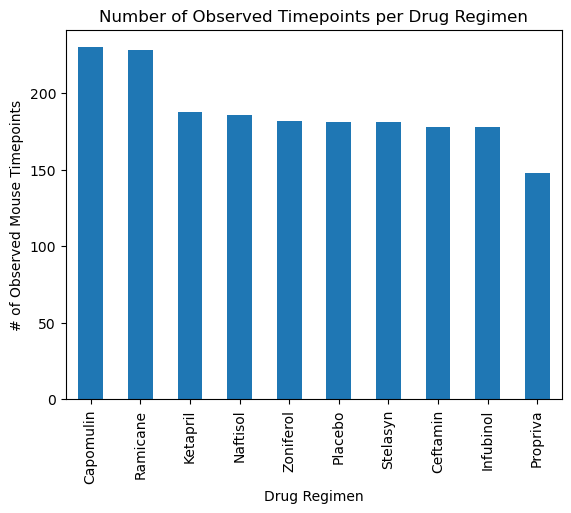

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data = clean_data.groupby('Drug Regimen').count()

bar_chart = bar_data['Timepoint'].sort_values(ascending=False).plot(
    kind="bar", title="Number of Observed Timepoints per Drug Regimen")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

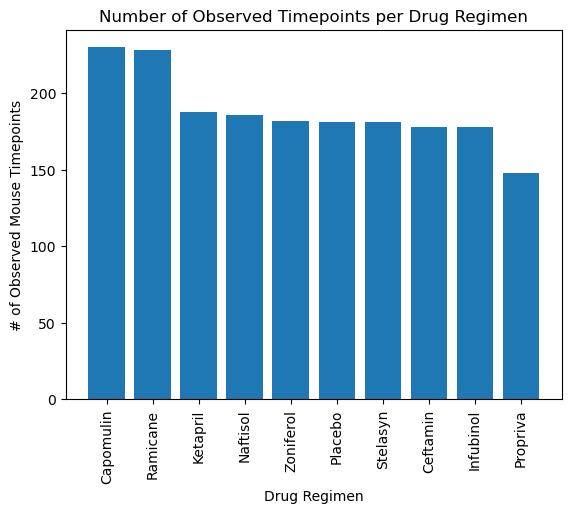

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
sorted_bar_data = bar_data['Timepoint'].sort_values(ascending=False)

plt.bar(sorted_bar_data.index, sorted_bar_data.values)
plt.title("Number of Observed Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

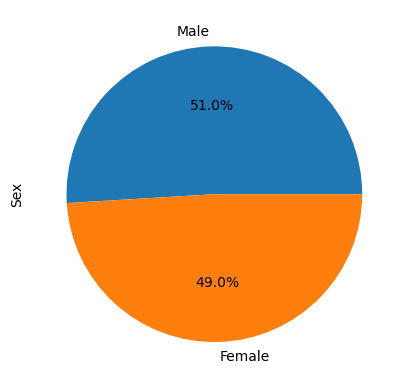

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = clean_data.groupby('Sex').count()

pie_plot = pie_data['Mouse ID'].sort_values(ascending=False).plot(kind="pie", autopct="%.1f%%")
pie_plot.set_ylabel("Sex")
plt.show()

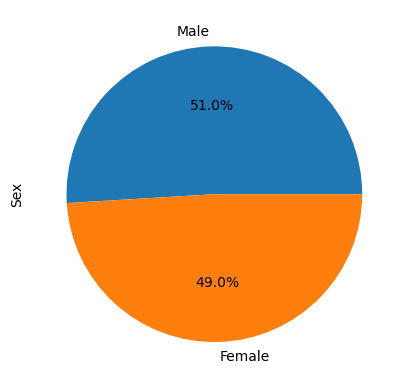

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sorted_pie_data = pie_data['Mouse ID'].sort_values(ascending=False)

plt.pie(sorted_pie_data.values, labels=sorted_pie_data.index, autopct="%.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
updated_merge = pd.merge(clean_data, last_timepoints, on=['Mouse ID', 'Timepoint'])

# Retrieve and display the maximum timepoint for each mouse
max_timepoint = updated_merge.loc[:, ['Mouse ID', 'Timepoint']]
max_timepoint

,Mouse ID,Timepoint
0,f932,0
1,x336,0
2,h428,0
3,v199,0
4,o848,0
...,...,...
243,r944,45
244,u364,45
245,p438,45
246,x773,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []
for drug in treatments:
    data = updated_merge.loc[updated_merge['Drug Regimen'] == drug]
    tumor_data.append(data)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    lower_quartile = data['Tumor Volume (mm3)'].quantile(0.25)
    upper_quartile = data['Tumor Volume (mm3)'].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    lower_bounds = lower_quartile - (1.5*iqr)
    upper_bounds = upper_quartile + (1.5*iqr)

    # Determine outliers by using upper and lower bounds
    outliers = data.loc[(
        data['Tumor Volume (mm3)'] < lower_bounds) | (data['Tumor Volume (mm3)'] > upper_bounds)]
    
    # Display the IQR and outliers for each treatment group
    print(f"{drug}'s potential outliers: {outliers['Tumor Volume (mm3)']}")
    print(f"{drug}'s IQR: {round(iqr, 3)}\n")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's IQR: 7.782

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's IQR: 9.099

Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Infubinol's IQR: 11.477

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's IQR: 15.578



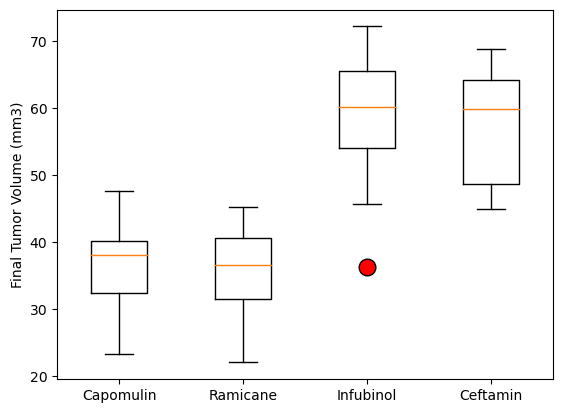

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_df = pd.DataFrame({
    'Capomulin': tumor_data[0]['Tumor Volume (mm3)'].reset_index(drop=True),
    'Ramicane': tumor_data[1]['Tumor Volume (mm3)'].reset_index(drop=True),
    'Infubinol': tumor_data[2]['Tumor Volume (mm3)'].reset_index(drop=True),
    'Ceftamin': tumor_data[3]['Tumor Volume (mm3)'].reset_index(drop=True)})

plt.boxplot(tumor_df, labels=treatments, flierprops={'marker': 'o', 'markersize':12, 'markerfacecolor':'red'})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

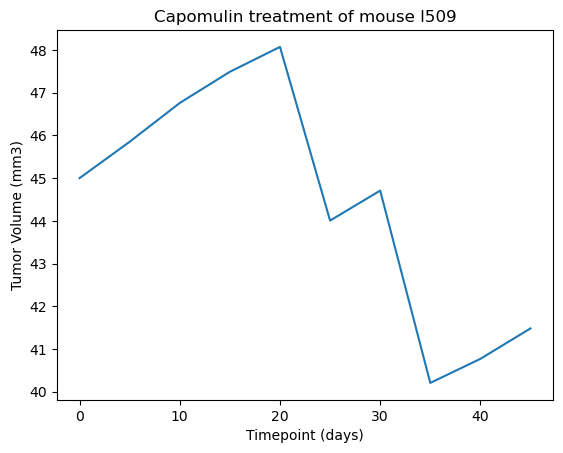

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
chosen_one = 'l509'
tumor_time = clean_data.loc[clean_data['Mouse ID'] == chosen_one, ['Tumor Volume (mm3)', 'Timepoint']]
tumor_time = tumor_time.set_index('Timepoint')

line_plot = tumor_time.plot(kind="line", legend=False, title=f"Capomulin treatment of mouse {chosen_one}")
line_plot.set_xlabel("Timepoint (days)")
line_plot.set_ylabel("Tumor Volume (mm3)")
plt.show()

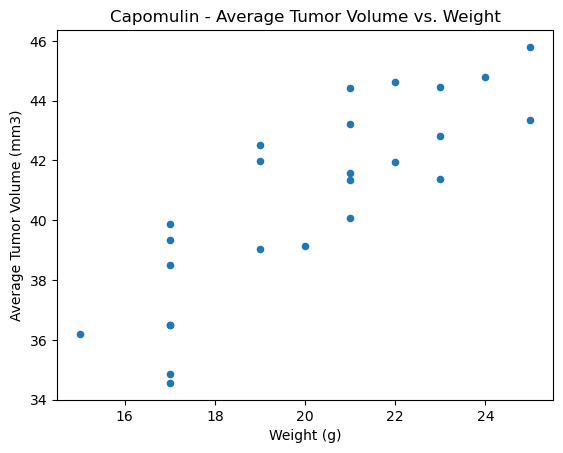

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
tumor_weight = clean_data.loc[
    clean_data['Drug Regimen'] == "Capomulin", ['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']]
average_volume = tumor_weight.groupby('Mouse ID').mean().reset_index()

scatter_plot = average_volume.plot(
    kind="scatter", x='Weight (g)', y='Tumor Volume (mm3)', title="Capomulin - Average Tumor Volume vs. Weight")
scatter_plot.set_ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84



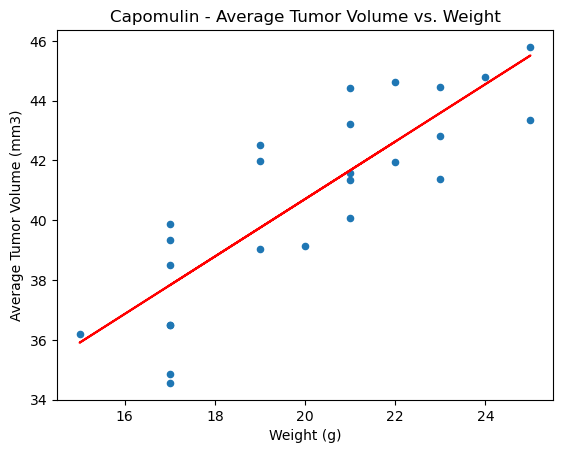

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Correlation Coefficient
correlation = st.pearsonr(average_volume['Weight (g)'], average_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}\n")

# Linear Regression Model
x_values = tumor_weight['Weight (g)']
y_values = tumor_weight['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regression_values = x_values * slope + intercept

# Plot the linear regression model on the scatter plot
scatter_plot = average_volume.plot(
    kind="scatter", x='Weight (g)', y='Tumor Volume (mm3)', title="Capomulin - Average Tumor Volume vs. Weight")
scatter_plot.set_ylabel("Average Tumor Volume (mm3)")
plt.plot(x_values, regression_values, color="red")
plt.show()